In [41]:
# 1. Import Libraries
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import joblib

In [42]:
# Suppress warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

In [43]:
# 2. Load the Dataset
try:
    data = pd.read_csv('car_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'car_dataset.csv' not found. Make sure the file is in the same directory.")
    exit()

Dataset loaded successfully.


In [44]:
# 3. Initial Data Exploration
print("\nFirst 5 rows of the dataset:")
print(data.head())

print(f"\nShape of the dataset: {data.shape}")

print("\nDataset Info:")
data.info()


First 5 rows of the dataset:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Shape of the dataset: (4340, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1

In [45]:
# 4. Data Preprocessing
# Create 'age' feature from 'year'
current_year = datetime.datetime.now().year
data['age'] = current_year - data['year']

# Drop the original 'year' and 'name' columns
data.drop(['year', 'name'], axis=1, inplace=True)

print("\nDataset after adding 'age' and dropping 'year' and 'name':")
print(data.head())

# Correct Outlier Removal
# The original dataset has a few cars with extremely high prices.
# We will remove cars with a selling price greater than 60 lakhs to handle extreme outliers.
data = data[data['selling_price'] < 6000000]
print(f"\nShape of the dataset after removing outliers: {data.shape}")


# Encoding Categorical Columns
# Check unique values before mapping
print("\nUnique values in categorical columns:")
print("Fuel:", data['fuel'].unique())
print("Seller Type:", data['seller_type'].unique())
print("Transmission:", data['transmission'].unique())
print("Owner:", data['owner'].unique())

# Map categorical values to numerical ones
data['fuel'] = data['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})
data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})
data['transmission'] = data['transmission'].map({'Manual':0, 'Automatic':1})
data['owner'] = data['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})

# Handle any potential NaN values created if a category was missed in the map
data.dropna(inplace=True)

print("\nDataset after encoding categorical features:")
print(data.head())


Dataset after adding 'age' and dropping 'year' and 'name':
   selling_price  km_driven    fuel seller_type transmission         owner  \
0          60000      70000  Petrol  Individual       Manual   First Owner   
1         135000      50000  Petrol  Individual       Manual   First Owner   
2         600000     100000  Diesel  Individual       Manual   First Owner   
3         250000      46000  Petrol  Individual       Manual   First Owner   
4         450000     141000  Diesel  Individual       Manual  Second Owner   

   age  
0   18  
1   18  
2   13  
3    8  
4   11  

Shape of the dataset after removing outliers: (4338, 7)

Unique values in categorical columns:
Fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller Type: ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission: ['Manual' 'Automatic']
Owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']

Dataset after encoding categorical features:
   selling_price  km_driven  fuel  selle

In [46]:
# 5. Store Feature Matrix (X) and Target Vector (y)
X = data.drop('selling_price', axis=1)
y = data['selling_price']

print("\nShape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)


Shape of feature matrix X: (4338, 6)
Shape of target vector y: (4338,)


In [47]:
# 6. Splitting The Dataset Into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("\nData split into training and testing sets successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split into training and testing sets successfully.
X_train shape: (3470, 6)
X_test shape: (868, 6)


In [48]:
# 7. Model Training
print("\nTraining models...")
lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

xg = XGBRegressor()
xg.fit(X_train, y_train)
print("Models trained successfully.")


Training models...
Models trained successfully.



Model R2 Scores:
Linear Regression: 0.37044340442518764
Random Forest: 0.7005494308598251
Gradient Boosting: 0.63678699972221
XGBoost: 0.6902743577957153

Model Performance Comparison:
  Models  R2_SCORE
0     LR  0.370443
1     RF  0.700549
2    GBR  0.636787
3     XG  0.690274


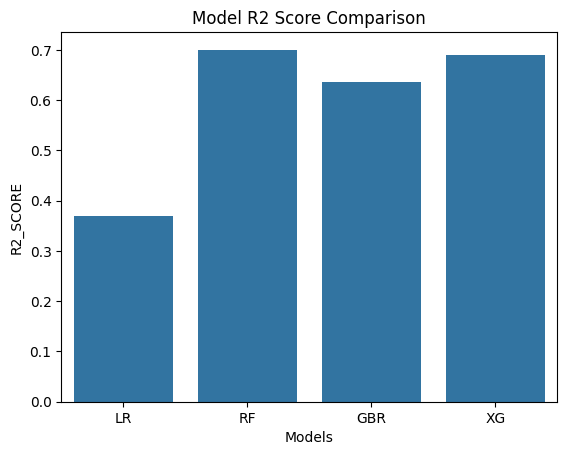

In [49]:
# 8. Evaluating the Models
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gbr.predict(X_test)
y_pred4 = xg.predict(X_test)

score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

print("\nModel R2 Scores:")
print("Linear Regression:", score1)
print("Random Forest:", score2)
print("Gradient Boosting:", score3)
print("XGBoost:", score4)

# Create a DataFrame for comparison
final_data = pd.DataFrame({
    'Models': ['LR', 'RF', 'GBR', 'XG'],
    'R2_SCORE': [score1, score2, score3, score4]
})

print("\nModel Performance Comparison:")
print(final_data)

# Visualize model performance
sns.barplot(x='Models', y='R2_SCORE', data=final_data)
plt.title('Model R2 Score Comparison')
plt.show()

In [50]:
# 9. Save The Best Model (XGBoost)
# We retrain the best model on the entire dataset
xg_final = XGBRegressor()
xg_final.fit(X, y)

joblib.dump(xg_final, 'car_price_predictor.joblib')
print("\nBest model (XGBoost) saved as 'car_price_predictor.joblib'")



Best model (XGBoost) saved as 'car_price_predictor.joblib'


In [51]:
# 10. Prediction on New Data
# Load the saved model
model = joblib.load('car_price_predictor.joblib')

# Create a new data sample with the correct column names and encoded values
# Features: km_driven, fuel, seller_type, transmission, owner, age
# Example: Predict price for a car with:
# km_driven=27000, fuel='Petrol'(0), seller_type='Dealer'(1), 
# transmission='Manual'(0), owner='First Owner'(0), age=8
new_data_dict = {
    'km_driven': 27000,
    'fuel': 0,        # Petrol
    'seller_type': 1, # Dealer
    'transmission': 0,# Manual
    'owner': 0,       # First Owner
    'age': 8
}
data_new = pd.DataFrame(new_data_dict, index=[0])

prediction = model.predict(data_new)
print(f"\nPredicted price for the new data: ₹{prediction[0]:,.2f}")



Predicted price for the new data: ₹507,165.50


In [52]:
# 11. GUI (Optional, requires tkinter)
# Note: To run this part, you need a desktop environment.
# It might not work in some cloud-based notebook platforms.
try:
    from tkinter import *

    def show_entry_fields():
        try:
            # Get values from GUI fields
            km_driven = float(e1.get())
            fuel = float(e2.get())
            seller_type = float(e3.get())
            transmission = float(e4.get())
            owner = float(e5.get())
            age = float(e6.get())
            
            # Create DataFrame for prediction
            data_gui = pd.DataFrame({
                'km_driven': km_driven,
                'fuel': fuel,
                'seller_type': seller_type,
                'transmission': transmission,
                'owner': owner,
                'age': age
            }, index=[0])
            
            # Predict
            result = model.predict(data_gui)
            result_text = f"Predicted Price: ₹{result[0]:,.2f}"
            
            # Display result
            result_label.config(text=result_text)

        except ValueError:
            result_label.config(text="Error: Please enter valid numbers.")
        except Exception as e:
            result_label.config(text=f"An error occurred: {e}")

    master = Tk()
    master.title("Car Price Prediction")

    Label(master, text="Car Price Prediction Model", bg="black", fg="white").grid(row=0, columnspan=2, pady=10)

    # Input fields with correct labels
    Label(master, text="Kilometers Driven").grid(row=1, sticky=W, padx=10)
    Label(master, text="Fuel Type (Petrol=0, Diesel=1, etc.)").grid(row=2, sticky=W, padx=10)
    Label(master, text="Seller Type (Individual=0, Dealer=1)").grid(row=3, sticky=W, padx=10)
    Label(master, text="Transmission (Manual=0, Automatic=1)").grid(row=4, sticky=W, padx=10)
    Label(master, text="Owner (First=0, Second=1, etc.)").grid(row=5, sticky=W, padx=10)
    Label(master, text="Age of Car (in years)").grid(row=6, sticky=W, padx=10)

    e1 = Entry(master)
    e2 = Entry(master)
    e3 = Entry(master)
    e4 = Entry(master)
    e5 = Entry(master)
    e6 = Entry(master)

    e1.grid(row=1, column=1, padx=10)
    e2.grid(row=2, column=1, padx=10)
    e3.grid(row=3, column=1, padx=10)
    e4.grid(row=4, column=1, padx=10)
    e5.grid(row=5, column=1, padx=10)
    e6.grid(row=6, column=1, padx=10)

    Button(master, text='Predict', command=show_entry_fields).grid(row=7, columnspan=2, pady=10)

    result_label = Label(master, text="", font=("Helvetica", 12))
    result_label.grid(row=8, columnspan=2, pady=10)
    
    # Add a quit button
    Button(master, text='Quit', command=master.quit).grid(row=9, columnspan=2, pady=5)

    mainloop()

except ImportError:
    print("\nTkinter library not found. GUI cannot be launched.")
except Exception as e:
    print(f"\nAn error occurred while trying to launch the GUI: {e}")
